# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [86]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

stat, p = stats.ttest_ind(A, B)
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, нет различий в эффекте у пациентов групп A и B")
else:
    print("Отклоняем нулевую гипотезу, есть различия в эффекте у пациентов групп A и B")

Статистика = -1.734, p = 0.085
Не отклоняем нулевую гипотезу, нет различий в эффекте у пациентов групп A и B


In [87]:
stat, p = stats.mannwhitneyu(A, B)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, нет различий в эффекте у пациентов групп A и B")
else:
    print("Отклоняем нулевую гипотезу, есть различия в эффекте у пациентов групп A и B")

Статистика = 4343.00000, p = 0.10870
Не отклоняем нулевую гипотезу, нет различий в эффекте у пациентов групп A и B


<Axes: ylabel='Density'>

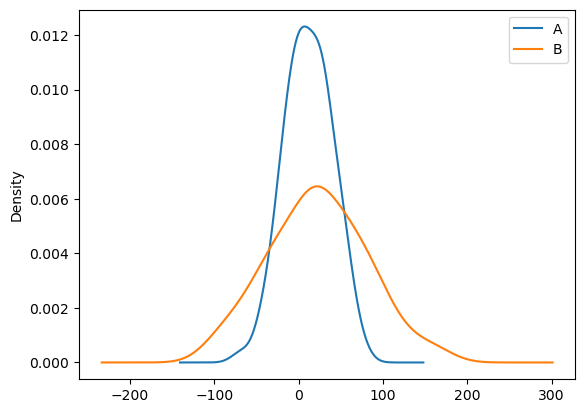

In [88]:
data = pd.DataFrame({'A': A,'B': B})
data.plot(kind='density')

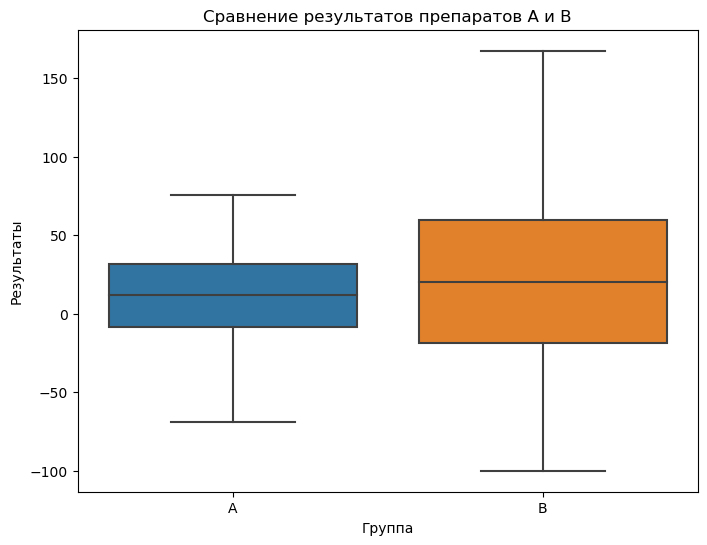

In [89]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[A, B])
plt.xlabel('Группа')
plt.ylabel('Результаты')
plt.title('Сравнение результатов препаратов A и B')
plt.xticks([0, 1], ['A', 'B'])
plt.show()

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [90]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

stat, p = stats.kruskal(water, nutri, mineral)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 17.607, p = 0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


In [91]:
stat, p = stats.ttest_ind(nutri, mineral)
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, нет различий в эффекте от удобрения и менералки")
else:
    print("Отклоняем нулевую гипотезу, есть различия в эффекте от удобрения и минералки")

Статистика = 4.258, p = 0.000
Отклоняем нулевую гипотезу, есть различия в эффекте от удобрения и минералки


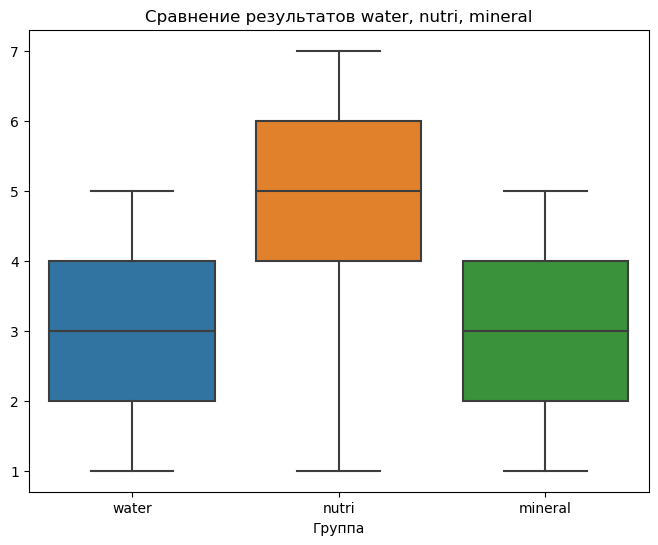

In [92]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[water, nutri, mineral])
plt.xlabel('Группа')
plt.title('Сравнение результатов water, nutri, mineral')
plt.xticks([0, 1, 2], ['water', 'nutri', 'mineral'])
plt.show()

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [93]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, on_bad_lines='skip')  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [94]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


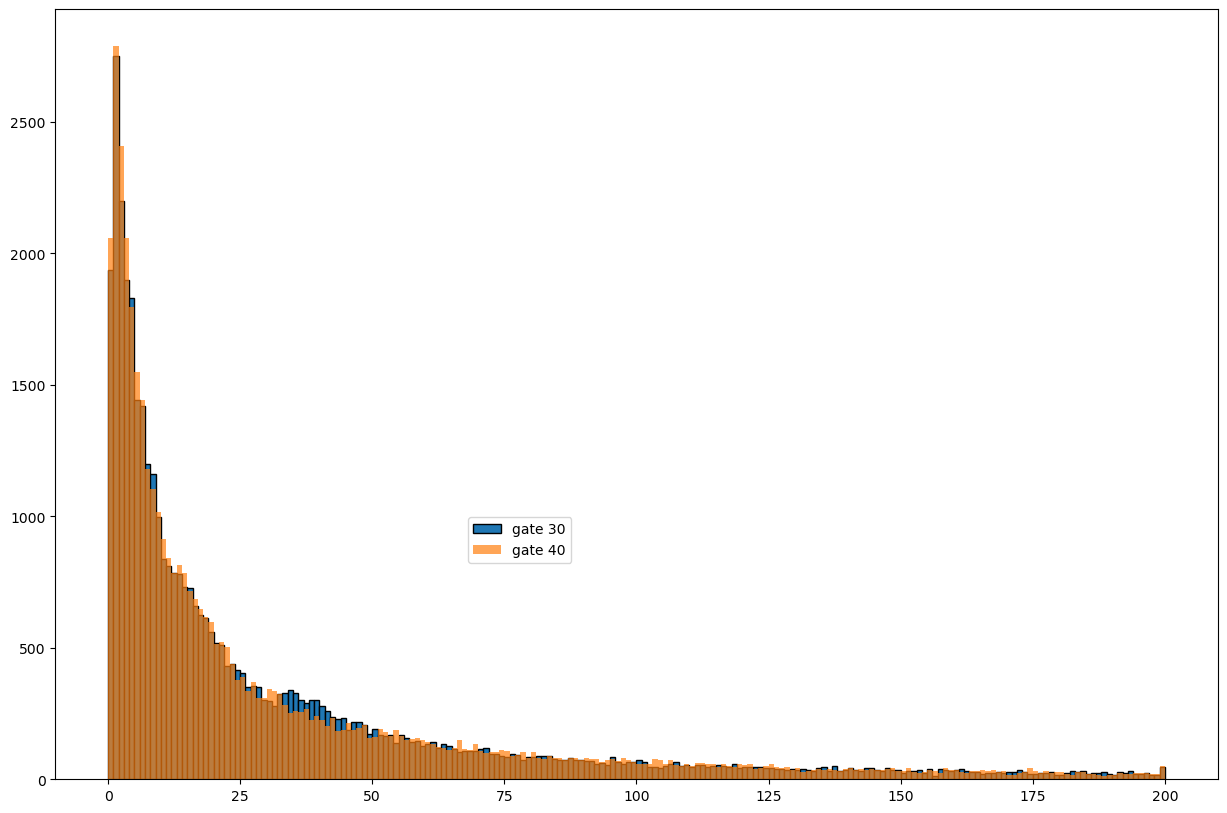

In [95]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

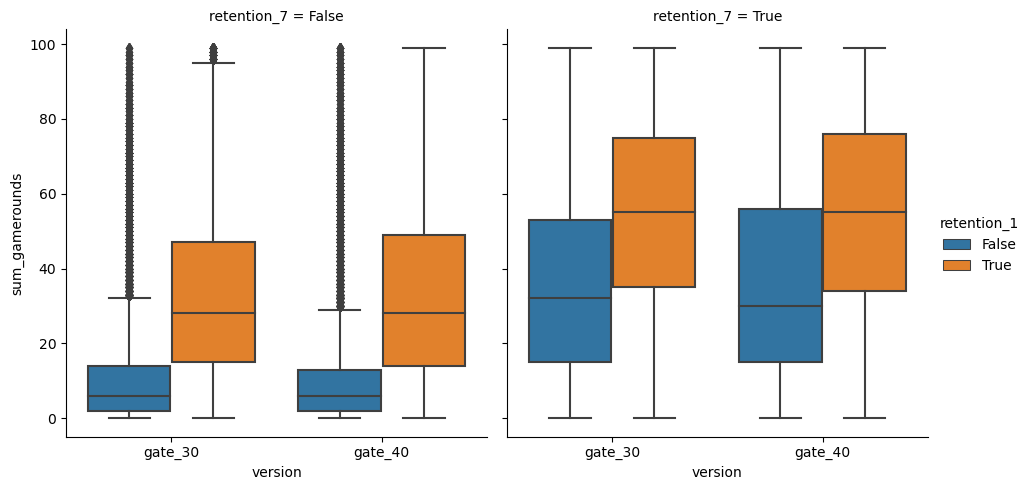

In [96]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

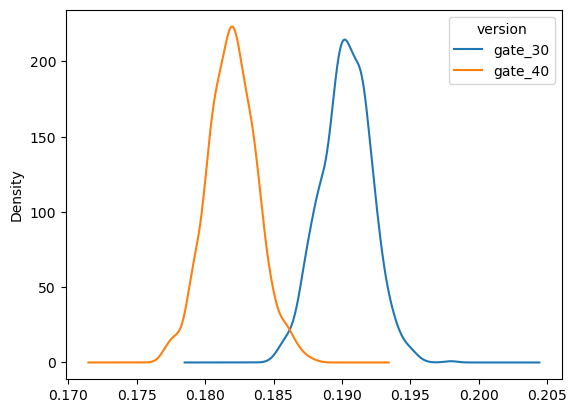

In [97]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

In [184]:
boot_1d

version,gate_30,gate_40
retention_7,0.186217,0.184276
retention_7,0.187197,0.183357
retention_7,0.192843,0.182120
retention_7,0.187698,0.182253
retention_7,0.194158,0.183614
...,...,...
retention_7,0.189242,0.182040
retention_7,0.190171,0.183238
retention_7,0.191549,0.186212
retention_7,0.189296,0.181321


<span style="color:red">**ВОТ ТУТ ЯЧЕЙКА НИЖЕ - ЭТО, ПО СУТИ, РЕШЕНИЕ ЗАДАЧИ. УБРАТЬ БЫ ЕЁ ТОГДА**</span>

In [98]:
#from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

#f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print(f, p)
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Statistics=1024331250.500, p=0.050
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [99]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

In [104]:
stat, p = stats.levene(boot_1d['gate_30'], boot_1d['gate_40'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=0.451, p=0.50194
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [101]:
stat, p = stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=101.435, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Ниже, пожалуйста, напишите Ваши выводы на основании решения:

Так как 𝑝-value стремится к нулю,то мы отвергаем нулевую гипотезу о том, что средние значения двух выборок одинаковые, и принимаем альтернативную гепотезуо том, что существует статистически значимая разница между тем где поставить ворота. Целесообразнее поставить ворота на 30-ом уровне, что позволит повысить количество игроков, сохранить вовлеченность и увеличить время жизни пользователя.

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [217]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, on_bad_lines='skip')
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [219]:
grass = pokemon.loc[
    ((pokemon['Class 1']=='Grass')&(pokemon['Class 2']!='Rock'))
    |
    ((pokemon['Class 2']=='Grass')&(pokemon['Class 1']!='Rock')),['Attack']
].copy()
rock = pokemon.loc[
    ((pokemon['Class 1']=='Rock')&(pokemon['Class 2']!='Grass'))
    |
    ((pokemon['Class 2']=='Rock')&(pokemon['Class 1']!='Grass')),['Attack']
].copy()
grass_rock = pd.concat([grass['Attack'], rock['Attack']], axis=1, keys=['Grass Attack', 'Rock Attack'])

In [229]:
grass_rock.describe()

,Grass Attack,Rock Attack
count,93.000000,56.000000
mean,73.731183,91.785714
std,24.179645,34.805284
min,27.000000,10.000000
25%,59.000000,63.000000
50%,70.000000,92.500000
75%,95.000000,116.250000
max,132.000000,165.000000


<Axes: ylabel='Density'>

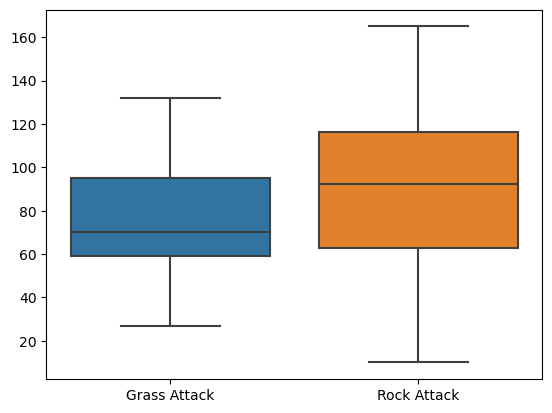

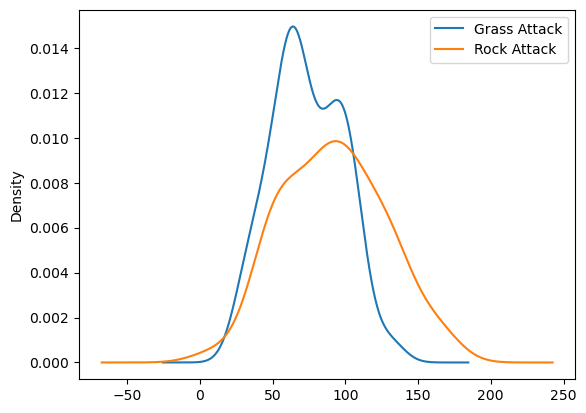

In [222]:
sns.boxplot(data=grass_rock)
grass_rock.plot(kind='density')

In [211]:
stat, p = stats.ttest_ind(grass, rock, equal_var=False)
print('Статистика=%.3f, p=%.5f' % (stat, p))

if p < 0.05:
    print("Существует статистически значимое различие в обычной атаке между покемонами класса 'Grass' и 'Rock'.")
else:
    print("Нет статистически значимого различия в обычной атаке между покемонами класса 'Grass' и 'Rock'.")

Статистика=-3.417, p=0.00096
Существует статистически значимое различие в обычной атаке между покемонами класса 'Grass' и 'Rock'.


Вывод:
Существует статистически значимое различие в обычной атаке между покемонами класса 'Grass' и 'Rock'. Средняя атака класса 'Rock' больше чем средняя атака класса 'Grass'. Профессор был неверен в своих убеждениях.

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [223]:
water = pokemon.loc[
    ((pokemon['Class 1']=='Water')&(pokemon['Class 2']!='Normal'))
    |
    ((pokemon['Class 2']=='Water')&(pokemon['Class 1']!='Normal')),['Speed']
].copy()
normal = pokemon.loc[
    ((pokemon['Class 1']=='Normal')&(pokemon['Class 2']!='Water'))
    |
    ((pokemon['Class 2']=='Normal')&(pokemon['Class 1']!='Water')),['Speed']
].copy()
water_normal = pd.concat([water['Speed'], normal['Speed']], axis=1, keys=['Water Speed', 'Normal Speed'])

In [224]:
water_normal.describe()

,Water Speed,Normal Speed
count,125.00000,101.000000
mean,64.93600,72.257426
std,22.74889,28.427330
min,15.00000,5.000000
25%,50.00000,50.000000
50%,65.00000,72.000000
75%,81.00000,93.000000
max,122.00000,135.000000


<Axes: ylabel='Density'>

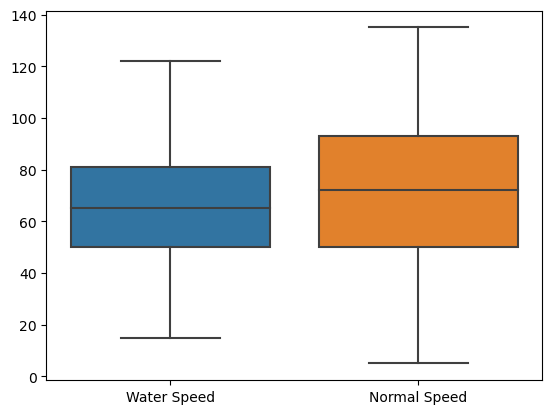

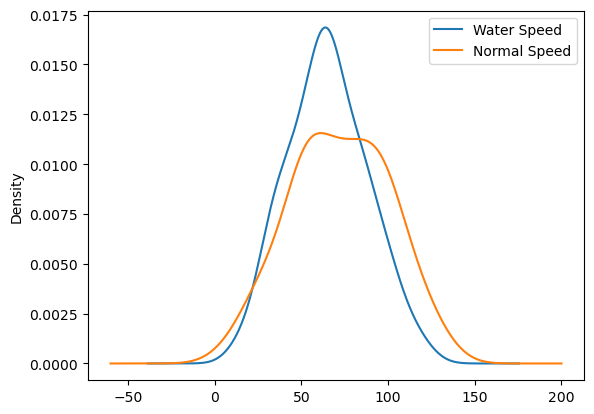

In [225]:
sns.boxplot(data=water_normal)
water_normal.plot(kind='density')

In [227]:
stat, p = stats.ttest_ind(water, normal, equal_var=False)
print('Статистика=%.3f, p=%.5f' % (stat, p))

if p < 0.05:
    print("Существует статистически значимое различие в средней скорости между покемонами класса 'Water' и 'Normal'.")
else:
    print("Нет статистически значимого различия в средней скорости между покемонами класса 'Water' и 'Normal'.")

Статистика=-2.101, p=0.03695
Существует статистически значимое различие в средней скорости между покемонами класса 'Water' и 'Normal'.


Вывод: Существует статистически значимое различие в средней скорости между покемонами класса 'Water' и 'Normal'. Средняя атака класса 'Water' меньше чем средняя атака класса 'Normal'. Профессор был неверен в своих убеждениях.

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [228]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [245]:
treathed = pokemon[pokemon['Name'].isin(treathed_pokemon)][['Name', 'Speed']]
treathed.describe()

,Speed
count,4.000000
mean,145.000000
std,7.071068
min,135.000000
25%,142.500000
50%,147.500000
75%,150.000000
max,150.000000


In [247]:
pokemon['Speed'].mean()

68.2775

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 2.]),
 array([135. , 136.5, 138. , 139.5, 141. , 142.5, 144. , 145.5, 147. ,
        148.5, 150. ]),
 <BarContainer object of 10 artists>)

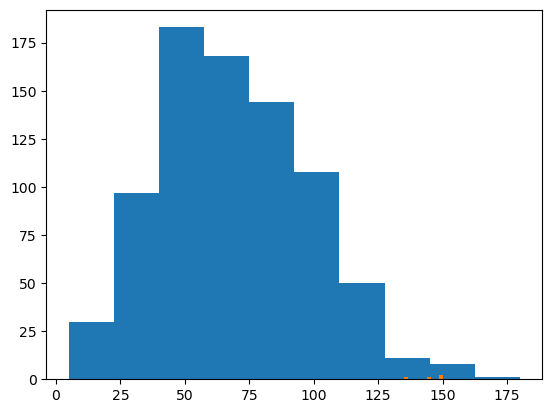

In [274]:
plt.hist(pokemon['Speed'], bins=10)
plt.hist(treathed['Speed'], bins=10)

In [258]:
stat, p = stats.ttest_1samp(a=treathed['Speed'], popmean=pokemon['Speed'].mean())
print('Статистика=%.3f, p=%.5f' % (stat, p))

if p < 0.05:
    print("Существует статистически значимое различие в средней скорости между покемонами в массиве 'treathed_pokemon' и средней скоростью всех покемонов.")
else:
    print("Нет статистически значимого различия в средней скорости между покемонами в массиве 'treathed_pokemon' и средней скоростью всех покемонов.")

Статистика=21.700, p=0.00021
Существует статистически значимое различие в средней скорости между покемонами в массиве 'treathed_pokemon' и средней скоростью всех покемонов.


Вывод: Средняя скорость покемонов которым был дан препарат больше средней скорости всех покемонов, отсюда можнло предположить, что препарат работает

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [280]:
legendary = pokemon.loc[pokemon['Legendary']==True][['HP', 'Attack', 'Defense']]
other = pokemon.loc[pokemon['Legendary'] == False, ['HP', 'Attack', 'Defense']]
sum_legendary = legendary[['HP', 'Attack', 'Defense']].sum(axis=1)
product_legendary = legendary[['HP', 'Attack', 'Defense']].product(axis=1)
sum_other = other[['HP', 'Attack', 'Defense']].sum(axis=1)
product_other = other[['HP', 'Attack', 'Defense']].product(axis=1)

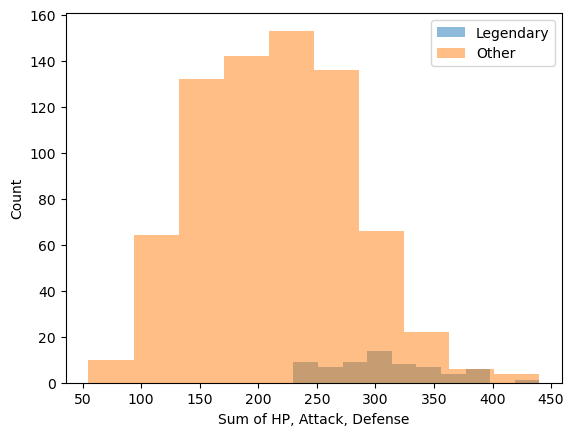

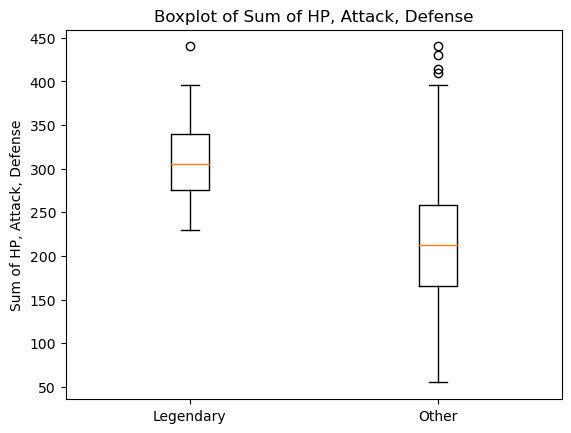

In [291]:
plt.hist(sum_legendary, alpha=0.5, label='Legendary')
plt.hist(sum_other, alpha=0.5, label='Other')
plt.xlabel('Sum of HP, Attack, Defense')
plt.ylabel('Count')
plt.legend()
plt.show()


plt.boxplot([sum_legendary, sum_other], labels=['Legendary', 'Other'])
plt.ylabel('Sum of HP, Attack, Defense')
plt.title('Boxplot of Sum of HP, Attack, Defense')
plt.show()

In [294]:
stat, p = stats.ttest_ind(sum_legendary, sum_other, equal_var=False)

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p < 0.05:
    print("Отклоняем нулевую гипотезу, есть различия")
else:
    print("Не отклоняем нулевую гипотезу различий нет.")

Статистика=15.198, p=0.00000
Отклоняем нулевую гипотезу, есть различия


Сумма характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов

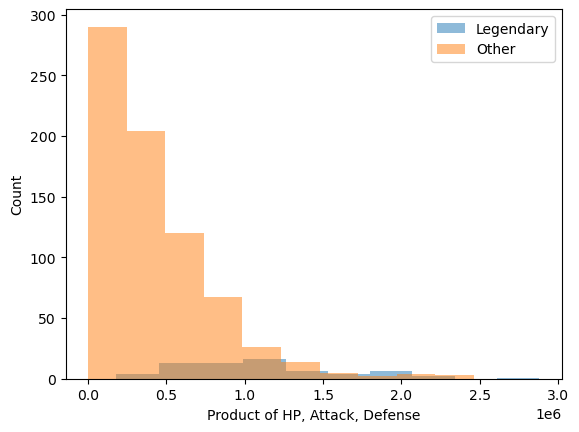

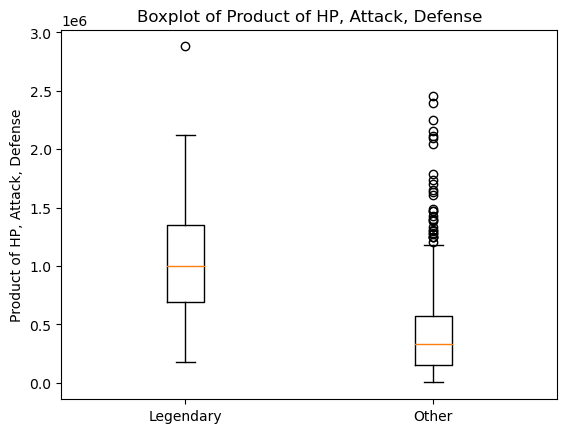

In [292]:
plt.hist(product_legendary, alpha=0.5, label='Legendary')
plt.hist(product_other, alpha=0.5, label='Other')
plt.xlabel('Product of HP, Attack, Defense')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.boxplot([product_legendary, product_other], labels=['Legendary', 'Other'])
plt.ylabel('Product of HP, Attack, Defense')
plt.title('Boxplot of Product of HP, Attack, Defense')
plt.show()

In [297]:
stat, p = stats.ttest_ind(product_legendary, product_other, equal_var=False)
print('Статистика=%.3f, p=%.5f' % (stat, p))

if p < 0.05:
    print("Отклоняем нулевую гипотезу, есть различия")
else:
    print("Не отклоняем нулевую гипотезу различий нет.")

Статистика=10.079, p=0.00000
Отклоняем нулевую гипотезу, есть различия


Произведение характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [259]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [299]:
rock = pokemon[pokemon['Class 1'] == 'Rock']['Defense']
ground = pokemon[pokemon['Class 1'] == 'Ground']['Defense']
steel = pokemon[pokemon['Class 1'] == 'Steel']['Defense']
ice = pokemon[pokemon['Class 1'] == 'Ice']['Defense']

stat, p = stats.f_oneway(rock, ground, steel, ice)
print('Статистика=%.3f, p=%.5f' % (stat, p))

if p < 0.05:
    print("Различие в уровне защиты между классами покемонов статистически значимо.")
else:
    print("Различие в уровне защиты между классами покемонов не является статистически значимым.")

Статистика=10.577, p=0.00000
Различие в уровне защиты между классами покемонов статистически значимо.


In [300]:
stat, p = stats.kruskal(rock, ground, steel, ice)
print('Статистика=%.3f, p=%.5f' % (stat, p))

if p < 0.05:
    print("Различие в уровне защиты между классами покемонов статистически значимо.")
else:
    print("Различие в уровне защиты между классами покемонов не является статистически значимым.")

Статистика=26.129, p=0.00001
Различие в уровне защиты между классами покемонов статистически значимо.
